## 1、change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [153]:
from sklearn.datasets import load_boston
%matplotlib inline
from matplotlib import pyplot as plt

In [150]:
data = load_boston()

In [151]:
x,y = data['data'],data['target']

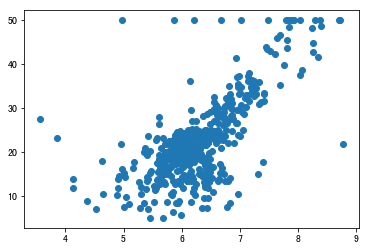

In [154]:
plt.scatter(x[:,5],y)

In [164]:
def price(rm,k,b):
    return k * rm +b

$$ loss = \frac{1}{n}\sum{|y_i-\hat{y_i}|} $$
$$ loss = \frac{1}{n}\sum{|y_i-(kx_i+b_i)|} $$
$$ \frac{\partial{loss}}{\partial{k}}= -\frac{1}{n}\sum{\frac{y_i-\hat{y_i}}{|y_i-\hat{y_i}|}x_i}  ,  y_i\neq\hat{y_i} $$
$$ \frac{\partial{loss}}{\partial{b}}= -\frac{1}{n}\sum{\frac{y_i-\hat{y_i}}{|y_i-\hat{y_i}|}}  ,  y_i\neq\hat{y_i} $$

In [155]:
import math

In [156]:
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [159]:
loss([1,2,3],[4,5,8])

3.6666666666666665

In [167]:
def partial_k(x,y,y_hat):
    n = len(y)
    return (-1/n)*sum([ ((y_i-y_hat_i)/abs(y_i-y_hat_i))*x_i for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)) if y_i != y_hat_i])

In [168]:
def partial_b(y,y_hat):
    n = len(y)
    return (-1/n)*sum([ ((y_i-y_hat_i)/abs(y_i-y_hat_i)) for y_i,y_hat_i in zip(list(y),list(y_hat)) if y_i != y_hat_i])

In [171]:
import random

x_rm = x[:,5]
min_loss = float('inf')  #正无穷


trying_times=10000

current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-02

for i in range(trying_times):
   
  
    price_by_k_b = [price(r,current_k,current_b) for r in x_rm]
    
    current_loss = loss(y,price_by_k_b)
    #print(current_loss)
    
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
        
    k_gradient = partial_k(x_rm,y,price_by_k_b)
    b_gradient = partial_b(y,price_by_k_b)
    
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate

When time is : 0, get best_k: 27.23586509080043 best_b: -9.485358376703388, and the loss is: 139.1492896181043
When time is : 50, get best_k: 24.093547897124594 best_b: -10.485358376703367, and the loss is: 118.40097492676234
When time is : 100, get best_k: 20.951230703448758 best_b: -11.485358376703346, and the loss is: 97.65266023542036
When time is : 150, get best_k: 17.80891350977292 best_b: -12.485358376703324, and the loss is: 76.90434554407857
When time is : 200, get best_k: 14.666596316097046 best_b: -13.485358376703303, and the loss is: 56.15603085273645
When time is : 250, get best_k: 11.528826671828263 best_b: -14.483461143501716, and the loss is: 35.47026621021357
When time is : 300, get best_k: 8.434600110563425 best_b: -15.464963119786287, and the loss is: 15.362727877864906
When time is : 350, get best_k: 6.324950426768958 best_b: -16.15966667709854, and the loss is: 4.931722147254275
When time is : 400, get best_k: 6.160430901077257 best_b: -16.243144937968104, and the 

When time is : 3600, get best_k: 6.436760663922779 best_b: -17.97942952295009, and the loss is: 4.761003452217981
When time is : 3650, get best_k: 6.4406818892192215 best_b: -18.00504217117142, and the loss is: 4.760317806866152
When time is : 3700, get best_k: 6.444855367480091 best_b: -18.030575768009353, and the loss is: 4.759630945106074
When time is : 3750, get best_k: 6.448776592776534 best_b: -18.056188416230686, and the loss is: 4.758943358302678
When time is : 3800, get best_k: 6.452697818072977 best_b: -18.08180106445202, and the loss is: 4.758257712950847
When time is : 3850, get best_k: 6.456871296333847 best_b: -18.10733466128995, and the loss is: 4.757570561723034
When time is : 3900, get best_k: 6.46079252163029 best_b: -18.132947309511284, and the loss is: 4.756883264387367
When time is : 3950, get best_k: 6.464713746926733 best_b: -18.158559957732617, and the loss is: 4.756197619035541
When time is : 4000, get best_k: 6.468887225187602 best_b: -18.18409355457055, and t

When time is : 7200, get best_k: 6.730012758784505 best_b: -19.811287230458795, and the loss is: 4.712004443413352
When time is : 7250, get best_k: 6.734120703448541 best_b: -19.83650462176312, and the loss is: 4.711334296072218
When time is : 7300, get best_k: 6.737976632302301 best_b: -19.861801064450844, and the loss is: 4.710664789735124
When time is : 7350, get best_k: 6.742084576966337 best_b: -19.887018455755168, and the loss is: 4.709995685174849
When time is : 7400, get best_k: 6.745940505820097 best_b: -19.912314898442894, and the loss is: 4.709325136056893
When time is : 7450, get best_k: 6.749796434673857 best_b: -19.93761134113062, and the loss is: 4.708656613844003
When time is : 7500, get best_k: 6.753904379337893 best_b: -19.962828732434943, and the loss is: 4.707985741628551
When time is : 7550, get best_k: 6.757760308191653 best_b: -19.98812517512267, and the loss is: 4.707316960165767
When time is : 7600, get best_k: 6.761868252855689 best_b: -20.013342566426992, and

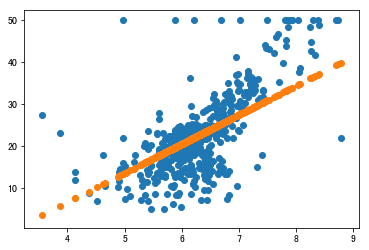

In [172]:
x_rm = x[:,5]
k = 6.955909043369731 
b = -21.192235847058193
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

plt.scatter(x[:,5],y) #实际值
plt.scatter(x_rm, price_by_random_k_and_b)

## 2、Finish the Solution Parse Part of Edit-Distance

In [137]:
solution = {}

In [142]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [143]:
edit_distance('pyhtno','python')

3

In [144]:
solution

{('p', 'p'): '',
 ('p', 'py'): 'ADD y',
 ('p', 'pyt'): 'ADD t',
 ('p', 'pyth'): 'ADD h',
 ('p', 'pytho'): 'ADD o',
 ('p', 'python'): 'ADD n',
 ('py', 'p'): 'DEL y',
 ('py', 'py'): '',
 ('py', 'pyt'): 'ADD t',
 ('py', 'pyth'): 'ADD h',
 ('py', 'pytho'): 'ADD o',
 ('py', 'python'): 'ADD n',
 ('pyh', 'p'): 'DEL h',
 ('pyh', 'py'): 'DEL h',
 ('pyh', 'pyt'): 'SUB h => t',
 ('pyh', 'pyth'): '',
 ('pyh', 'pytho'): 'ADD o',
 ('pyh', 'python'): 'ADD n',
 ('pyht', 'p'): 'DEL t',
 ('pyht', 'py'): 'DEL t',
 ('pyht', 'pyt'): '',
 ('pyht', 'pyth'): 'DEL t',
 ('pyht', 'pytho'): 'SUB t => o',
 ('pyht', 'python'): 'ADD n',
 ('pyhtn', 'p'): 'DEL n',
 ('pyhtn', 'py'): 'DEL n',
 ('pyhtn', 'pyt'): 'DEL n',
 ('pyhtn', 'pyth'): 'SUB n => h',
 ('pyhtn', 'pytho'): 'DEL n',
 ('pyhtn', 'python'): '',
 ('pyhtno', 'p'): 'DEL o',
 ('pyhtno', 'py'): 'DEL o',
 ('pyhtno', 'pyt'): 'DEL o',
 ('pyhtno', 'pyth'): 'DEL o',
 ('pyhtno', 'pytho'): '',
 ('pyhtno', 'python'): 'DEL o'}

In [112]:
def parse_operate(left,right,operate):
    cmd = operate.split(' ')
    if not cmd[0]: return left[:-1],right[:-1]
    if cmd[0] == 'SUB':
        return left[:-1]+cmd[3],right
    elif cmd[0] == 'ADD':
        return left+cmd[1],right
    else:
        return left[:-1],right 

In [123]:
def solution_edit_distance(left,right,solution):
    r_left = left
    r_right = right   
    solution_result = []
    while(True):
        if (r_left,r_right) in solution.keys(): 
            operate=solution[(r_left,r_right)]
        elif r_left[-1] == r_right[-1]:             
            r_left = r_left[:-1]
            r_right = r_right[:-1]
            continue
        else:
            print('ERROR: solution not fund:({},{})'.format(r_left,r_right))
            break
        
        r_left,r_right = parse_operate(r_left,r_right,operate)
        #print(r_left,r_right)
        solution_result.append(operate)
        if r_left == r_right: return solution_result
        

In [148]:
'==>'.join([str(x) for x in solution_edit_distance('pyhtno','python',solution) if x])

'DEL o==>SUB t => o==>ADD t'

In [146]:
edit_distance('bieji','beijing')

4

In [147]:
'==>'.join([str(x) for x in solution_edit_distance('bieji','beijing',solution) if x])

'ADD g==>ADD n==>DEL e==>ADD e'

## 3、Answer following questions:
1、Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
当搜索问题有很多重复的子问题时，动态规划就能很好的发挥作用

2、Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?


3、Can you catch up at least 3 problems which could solved by Dynamic Programming?

五子棋、路径规划

4、Can you catch up at least 3 problems wich could sloved by Edit Distance?

单词纠错、文本相似度

5、Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

    (1)、overlapping subproblems 很多重复的子问题
    (2)、overlapping computing saved in a table 把重复的计算用一个表存起来
    (3)、parse solution 解析存储的结果
    
6、What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

    (1).No general formation of Dynamic Program is available; every problem has to be solving in its own way.
    (2).Dividing problem in sub problem and storing inter mediate results consumes memory.
